In [2]:
from torch_geometric.datasets import MoleculeNet

In [3]:
import torch
import torch.nn as nn
from torch_geometric.nn import TransformerConv, global_mean_pool
from torch_geometric.data import Data, DataLoader
from torch.utils.data import Subset
import copy

In [4]:
dataset = MoleculeNet(root="./data", name="BACE")

In [5]:
dataset

BACE(1513)

In [6]:
dataset.num_features

9

In [7]:
dataset[0], dataset[2], len(dataset)

(Data(x=[32, 9], edge_index=[2, 70], edge_attr=[70, 3], smiles='O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2ccccc2C)C)CC1(C)C', y=[1, 1]),
 Data(x=[42, 9], edge_index=[2, 92], edge_attr=[92, 3], smiles='S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H]([C@H](O)C[NH2+]Cc1cc(OC)ccc1)Cc1ccccc1)C', y=[1, 1]),
 1513)

In [8]:
dataset[0].edge_attr

tensor([[ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  1],
        [ 1,  0,  1],
        [ 2,  0,  1],
        [ 1,  0,  0],
        [ 2,  0,  1],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [ 1,  0,  0],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [ 1,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [12,  0,  1],
        [ 1,  0,  1],
        [ 

In [9]:
dataset[0].x.dtype

torch.int64

In [10]:
total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = int(0.1 * total_size)
test_size = int(0.1 * total_size)

In [11]:
import random
datasetList = [elem for elem in dataset]
shuffled_list = random.sample(datasetList, len(datasetList))

In [12]:
train_data = dataset[: train_size]
val_data = dataset[train_size : (train_size + val_size)]
test_data = dataset[(train_size + val_size) :]

In [13]:
train_data = shuffled_list[: train_size]
val_data = shuffled_list[train_size : (train_size + val_size)]
test_data = shuffled_list[(train_size + val_size) :]

In [14]:
train_data, val_data, test_data, train_data[0], val_data[0], test_data[0]

([Data(x=[27, 9], edge_index=[2, 58], edge_attr=[58, 3], smiles='O=C1N(CCCCCC(=O)[O-])C(=NC1(C1CCCCC1)c1ccccc1)N', y=[1, 1]),
  Data(x=[26, 9], edge_index=[2, 56], edge_attr=[56, 3], smiles='Clc1ccc(nc1)C(=O)Nc1cc(ccc1)[C@@]1(N=C(N)CN(C)C1=O)C', y=[1, 1]),
  Data(x=[31, 9], edge_index=[2, 66], edge_attr=[66, 3], smiles='Fc1ccc(cc1C#CCCCF)[C@]1(N=C(N)N(C)C1=O)c1ccc(OC(F)F)cc1', y=[1, 1]),
  Data(x=[44, 9], edge_index=[2, 94], edge_attr=[94, 3], smiles='Fc1cc(cc(F)c1)C[C@H](NC(=O)c1cc(cc(c1)C)C(=O)N(CCC)CCC)[C@H](O)[C@@H]1[NH2+]CC[N@@H+](C1)Cc1ccccc1', y=[1, 1]),
  Data(x=[41, 9], edge_index=[2, 90], edge_attr=[90, 3], smiles='S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)NC(Cc1ccccc1)C(O)C[NH2+]C1CCOCC1)C(C)C', y=[1, 1]),
  Data(x=[44, 9], edge_index=[2, 96], edge_attr=[96, 3], smiles='FC(F)(F)c1cc(ccc1)C[NH2+]CC(O)C(NC(=O)c1cc(N2CCCC2=O)c2n(cc(c2c1)CC)C)Cc1ccccc1', y=[1, 1]),
  Data(x=[25, 9], edge_index=[2, 56], edge_attr=[56, 3], smiles='S1c2c(cc(cc2)-c2cncnc2)C2(N=C(N)N(C)C2=O)CC1(C)C', y=

In [15]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

c:\Users\MICHU13\AppData\Local\Programs\Python\Python39\lib\site-packages\torch_geometric\deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [16]:
train_loader = DataLoader(Subset(dataloader.dataset, range(train_size)), batch_size=32, shuffle=True)
val_loader = DataLoader(Subset(dataloader.dataset, range(train_size, train_size + val_size)), batch_size=32, shuffle=False)
test_loader = DataLoader(Subset(dataloader.dataset, range(train_size + val_size, total_size)), batch_size=32, shuffle=False)

In [17]:
len(train_loader), len(val_loader), len(test_loader)

(38, 5, 5)

In [26]:
class CustomTransformerModelLinear(nn.Module):
    def __init__(self, out_channels):
        super(CustomTransformerModelLinear, self).__init__()

        edge_dim=3 # edge_attr.size(1)

        self.conv1 = TransformerConv(dataset.num_features, 32, edge_dim=edge_dim) # 2 wymiarowy x na wejściu
        self.conv2 = TransformerConv(32, 64, edge_dim=edge_dim)
        self.conv3 = TransformerConv(64, 64, edge_dim=edge_dim)
        self.conv4 = TransformerConv(64, out_channels, edge_dim=edge_dim)

        self.relu = nn.ReLU()

        self.linear = nn.Linear(out_channels, 2) # klasyfikacja binarna

    def forward(self, data, flag):
        if flag:
            x = data.x.to(dtype=torch.float32)
            edge_index = data.edge_index
            edge_attr = data.edge_attr.to(dtype=torch.float32)

            x = self.conv1(x, edge_index, edge_attr)
            x = self.relu(x)

            x = self.conv2(x, edge_index, edge_attr)
            x = self.relu(x)

            x = self.conv3(x, edge_index, edge_attr)
            x = self.relu(x)
            
            x = self.conv4(x, edge_index, edge_attr)
            # x = self.relu(x)

            feature = torch.mean(x, dim=0)

            x = self.linear(feature)

            return x, feature
        else:
            x = self.linear(data)

            return x

In [84]:
class CustomTransformerModelPerceptron(nn.Module):
    def __init__(self, out_channels, hidden_layer_size):
        super(CustomTransformerModelPerceptron, self).__init__()

        edge_dim=3 # edge_attr.size(1)

        self.conv1 = TransformerConv(dataset.num_features, 32, edge_dim=edge_dim) # 2 wymiarowy x na wejściu
        self.conv2 = TransformerConv(32, 64, edge_dim=edge_dim)
        self.conv3 = TransformerConv(64, 64, edge_dim=edge_dim)
        self.conv4 = TransformerConv(64, out_channels, edge_dim=edge_dim)

        self.relu = nn.ReLU()

        self.linear1 = nn.Linear(out_channels, hidden_layer_size)
        self.linear2 = nn.Linear(hidden_layer_size, 2) # klasyfikacja binarna

    def forward(self, data, flag):
        if flag:
            x = data.x.to(dtype=torch.float32)
            edge_index = data.edge_index
            edge_attr = data.edge_attr.to(dtype=torch.float32)

            x = self.conv1(x, edge_index, edge_attr)
            x = self.relu(x)

            x = self.conv2(x, edge_index, edge_attr)
            x = self.relu(x)

            x = self.conv3(x, edge_index, edge_attr)
            x = self.relu(x)
            
            x = self.conv4(x, edge_index, edge_attr)
            # x = self.relu(x)

            feature = torch.mean(x, dim=0)

            x = self.linear1(feature)

            x = self.relu(x)

            x = self.linear2(x)

            return x, feature
        else:
            x = self.linear1(data)

            x = self.relu(x)

            x = self.linear2(x)

            return x

In [85]:
# model = CustomTransformerModelLinear(2)
model = CustomTransformerModelPerceptron(1, 4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 15
train_losses = []
val_losses = []
for epoch in range(epochs):
    model.train()
    for data in train_data:
        output = model(data).unsqueeze(0)

        labels = data.y[0]

        # print(output)
        # print(output.shape)
        # print(output.dtype)

        # print(labels)
        # print(labels.shape)
        # print(labels.dtype)

        loss = criterion(output, labels.long())


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # print(loss)
    train_losses.append(float(loss))

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_data:
            output = model(data).unsqueeze(0)
            labels = data.y[0]
            val_loss += criterion(output, labels.long()).item()

    val_loss /= len(val_data)
    val_losses.append(round(float(val_loss), 4))
    print(f'Epoch {epoch + 1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss}')

In [86]:
train_losses = []
val_losses = []
features = [] # tablica osadzeń
best_val_loss = 100
epoch = 0
epochs_without_improvement = 0
patience = 10
current_epoch = 0
predictions = []
while(True):
    epoch_features = []
    epoch_predictions = []
    model.train()
    for data in train_data:
        output, feature = model(data, True)
        output = output.unsqueeze(0)
        epoch_features.append(feature.tolist())
        epoch_predictions.append(output)

        labels = data.y[0]

        loss = criterion(output, labels.long())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_losses.append(float(loss))

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_data:
            output, _ = model(data, True)
            output = output.unsqueeze(0)
            labels = data.y[0]
            val_loss += criterion(output, labels.long()).item()

    val_loss /= len(val_data)
    val_losses.append(round(float(val_loss), 4))

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_without_improvement = 0
        features = epoch_features
        current_epoch = epoch
        predictions = epoch_predictions
        copied_model = copy.deepcopy(model)
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        torch.save(copied_model.state_dict(), f'one_dim_linear_transf_epoch{current_epoch}.pth')
        break
    
    print(f'Epoch {epoch + 1}, Training Loss: {loss.item()}, Validation Loss: {val_loss}')
    epoch += 1

Epoch 1, Training Loss: 0.8085856437683105, Validation Loss: 0.6679996749423197
Epoch 2, Training Loss: 0.7968499660491943, Validation Loss: 0.665735739153742
Epoch 3, Training Loss: 0.8072987198829651, Validation Loss: 0.657641824310189
Epoch 4, Training Loss: 0.7589194178581238, Validation Loss: 0.6558520683142918
Epoch 5, Training Loss: 0.6466245055198669, Validation Loss: 0.6480780957414713
Epoch 6, Training Loss: 0.6395207643508911, Validation Loss: 0.6421600020805139
Epoch 7, Training Loss: 0.5908267498016357, Validation Loss: 0.6554887385048984
Epoch 8, Training Loss: 0.5130595564842224, Validation Loss: 0.6512703622524806
Epoch 9, Training Loss: 0.521938145160675, Validation Loss: 0.6296768524970809
Epoch 10, Training Loss: 0.8167180418968201, Validation Loss: 0.6198216136066946
Epoch 11, Training Loss: 0.6095409393310547, Validation Loss: 0.6182314754426727
Epoch 12, Training Loss: 0.6054141521453857, Validation Loss: 0.6123092888872947
Epoch 13, Training Loss: 0.6013836264610

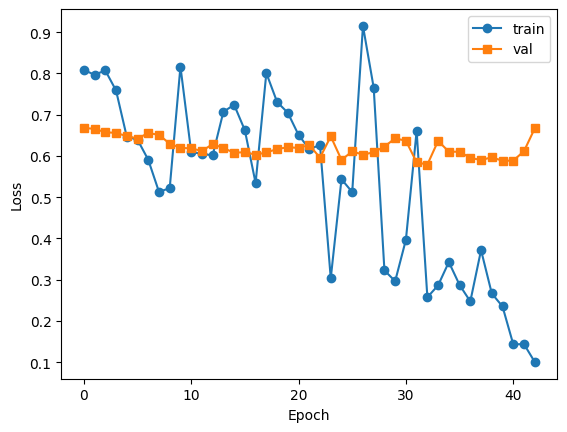

In [87]:
import matplotlib.pyplot as plt

# Example data
x_values = [i for i in range(len(val_losses))]

# Plotting
plt.plot(x_values, train_losses, label='train', marker='o')
plt.plot(x_values, val_losses, label='val', marker='s')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.title('Linear Plot of Two Lists')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [88]:
model = copied_model
test_correct = 0
model.eval()
with torch.no_grad():
      for data in test_data:
            # out = model(data).unsqueeze(0)
            out, _ = model(data, True)
            out = out.unsqueeze(0)
            pred = out.argmax(dim=1)  
            label = data.y[0]
            # print(out)
            # print(pred)
            if pred == label:
                  test_correct += 1 

test_acc = test_correct / len(test_data)

c1 = 0 # 0
c2 = 0 # 1
for data in test_data:
      if data.y[0] == 0:
            c1 += 1
      elif data.y[0] == 1:
            c2 += 1
      else:
            continue

print(test_acc)
print(c1)
print(c2)

0.743421052631579
77
75


In [ ]:
c1 = 0 # 0
c2 = 0 # 1
for data in val_data:
      if data.y[0] == 0:
            c1 += 1
      elif data.y[0] == 1:
            c2 += 1
      else:
            continue
      
print(c1)
print(c2)

86
65


In [ ]:
c1 = 0 # 0
c2 = 0 # 1
for data in train_data:
      if data.y[0] == 0:
            c1 += 1
      elif data.y[0] == 1:
            c2 += 1
      else:
            continue
      
print(c1)
print(c2)

639
571


In [ ]:
len(features), len(labels)

(1210, 152)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample 2D coordinates
coordinates = [[elem[0], random.randint(0, 10)] for elem in features]
# Sample labels (0 or 1)
# labels = [data.y[0] for data in train_data]
labels = [out.argmax(dim=1) for out in predictions]

# Separate coordinates based on labels
class_0 = [coordinates[i] for i in range(len(coordinates)) if labels[i] == 0]
class_1 = [coordinates[i] for i in range(len(coordinates)) if labels[i] == 1]

# Convert to NumPy arrays for easier manipulation
class_0 = np.array(class_0)
class_1 = np.array(class_1)

plt.figure(figsize=(28, 16))

# Create a scatter plot
plt.scatter(class_0[:, 0], class_0[:, 1], label='Class 0', color='blue')
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', color='red')

# Add decision boundary (for illustration purposes, you might need an actual model for this)
# This is just a simple horizontal line, replace with your actual decision boundary logic

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Decision Boundary')

# Add legend
plt.legend()
# Show the plot
plt.show()

C:\Users\MICHU13\AppData\Local\Temp\ipykernel_2244\3875063704.py:10: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  labels = np.array(labels)
C:\Users\MICHU13\AppData\Local\Temp\ipykernel_2244\3875063704.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.array(labels)


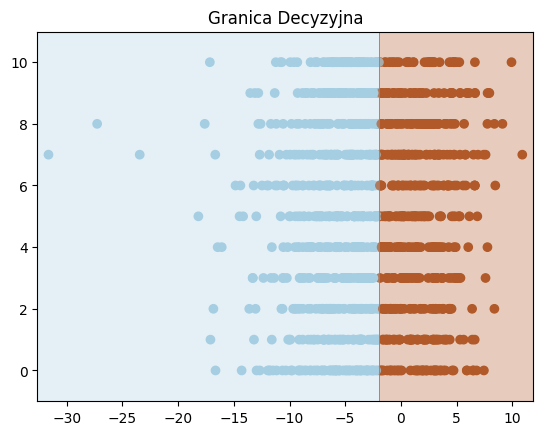

In [90]:
import numpy as np
import matplotlib.pyplot as plt

coordinates = [[elem[0], random.randint(0, 10)] for elem in features]
# coordinates = [[elem[0], elem[1]] for elem in features]
labels = [out.argmax(dim=1) for out in predictions]

# Convert to NumPy arrays for easier manipulation
coordinates = np.array(coordinates)
labels = np.array(labels)

# Plot the data points
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=labels, cmap=plt.cm.Paired)

# Plot the decision boundary using contourf
x_min, x_max = coordinates[:, 0].min() - 1, coordinates[:, 0].max() + 1
y_min, y_max = coordinates[:, 1].min() - 1, coordinates[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z_final = []
for i in range(len(xx.ravel())):
    # data = torch.tensor(np.c_[xx.ravel()[i], yy.ravel()[i]], dtype=torch.float32)
    data = torch.tensor(np.c_[xx.ravel()[i]], dtype=torch.float32)
    # print(data)
    Z = model(data, False)
    # Z = Z.unsqueeze(0) # z jakiegoś nieznanego mi powodu tu unsqueeze nie jest potrzebny
    Z = Z.argmax(dim=1)
    Z_final.append(Z[0]) 

Z_final = np.array(Z_final)
Z_final = Z_final.reshape(xx.shape)

plt.contourf(xx, yy, Z_final, cmap=plt.cm.Paired, alpha=0.3)

# Add labels and title
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
plt.title('Granica Decyzyjna')

# Show the plot
plt.show()


In [72]:
xx.shape, yy.shape, Z_final.shape, xx[0].shape, yy[0].shape, Z_final[0].shape, xx[0][0].shape, yy[0][0].shape, Z_final[0][0].shape

((1200, 1278),
 (1200, 1278),
 (1200, 1278),
 (1278,),
 (1278,),
 (1278,),
 (),
 (),
 ())

In [62]:
Z_final

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int64)

(692, 718)
(692, 718)
(692, 718)
(718,)
(718,)
(718,)
()
()
()
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

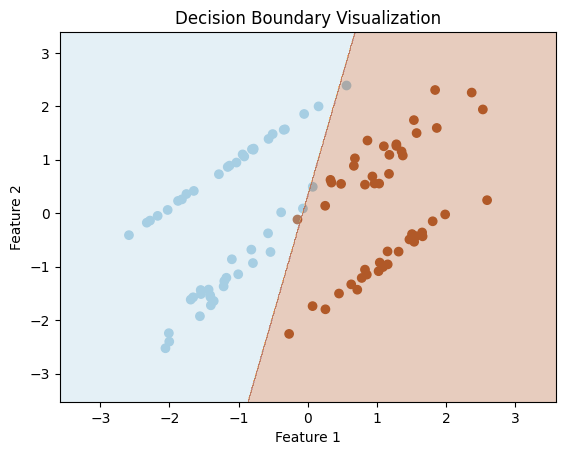

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model2 = LogisticRegression()
model2.fit(X_train, y_train)

# Plot decision boundary using numpy meshgrid and contourf
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z2 = model2.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z2 = Z2.reshape(xx2.shape)
print(xx2.shape)
print(yy2.shape)
print(Z2.shape)
print(xx2[0].shape)
print(yy2[0].shape)
print(Z2[0].shape)
print(xx2[0][0].shape)
print(yy2[0][0].shape)
print(Z2[0][0].shape)
print(Z2)
print(Z2[0])

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

# Plot the decision boundary using contourf
plt.contourf(xx2, yy2, Z2, cmap=plt.cm.Paired, alpha=0.3)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary Visualization')

# Show the plot
plt.show()
